In [78]:



import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
import os
import numpy as np

In [31]:
def import_aupr_and_correct(file_path):
    tf = os.path.basename(file_path).split("_")[0]
    
    cell = os.path.basename(file_path).split("_")[3]

    df = pd.read_csv(file_path, sep="\t", header=0)
    
    threshold = [""]
    df.drop(df.tail(1).index,inplace=True) # drop last n rows

    df = df[["Precision", "Recall", "Total_GoldStandard_Bins"]]
    
    precision_list = df["Precision"].tolist()
    
    #print(precision_list[-1])
    
    #df = df[df["Recall"] != 1]
    df = pd.concat([df, 
                    pd.DataFrame({"Precision": [precision_list[-1]], 
                                  "Recall": [0]
                    })])
    
    AUPRC = metrics.auc(y=df["Precision"], x=df["Recall"])

    return [tf, cell, AUPRC, df["Total_GoldStandard_Bins"].unique()[0]]

In [32]:
results_list = []

for file in glob.glob("/Users/caz3so/scratch/20210815_maxATAC_round_robin/average_AUPR/*.tsv"):
    tmp_df = import_aupr_and_correct(file)
    results_list.append(tmp_df)

In [33]:
df_average = pd.DataFrame(results_list, columns=["TF", "Cell", "AUPRC", "GS_bins"])

In [34]:
df_average["pairs"] = df_average["TF"] + "_" + df_average["Cell"]

In [177]:
maxatac_GS_dict = pd.Series(df_average.groupby(["TF"], as_index=False).median()["GS_bins"].values,index=df_average.groupby(["TF"], as_index=False).median()["TF"]).to_dict()

In [167]:
df_maxatac = pd.read_csv("/Users/caz3so/scratch/20210818_maxATAC_MOOD_ENCODE_publication/20210826_notcomplete_results.tsv", sep="\t")

In [177]:
df_maxatac = df_maxatac[df_maxatac["RandomRatio"] == 0.00].copy()

In [178]:
df_maxatac['pairs'] = df_maxatac["TF"] + "_" + df_maxatac["CT"]

In [171]:
maxatac_dict = pd.Series(df_average.groupby(["TF"], as_index=False).median()["AUPR"].values,index=df_average.groupby(["TF"], as_index=False).median()["TF"]).to_dict()


DataError: No numeric types to aggregate

In [156]:
df_average.groupby(["TF"], as_index=False).median()["AUPRC"].values


63

In [162]:
df_maxatac["average_aupr"] = df_maxatac["TF"].map(maxatac_dict)

In [178]:
df_maxatac["GS_BINS"] = df_maxatac["TF"].map(maxatac_GS_dict)

In [163]:
df_maxatac_gb_stats = df_maxatac.groupby(["TF"], as_index=False).median()

In [165]:
df_maxatac_gb_stats["average_aupr"] = df_maxatac_gb_stats["TF"].map(maxatac_dict)

In [180]:
df_maxatac["chr1_bins"] = 1136626

In [182]:
df_maxatac["random_aupr"] = df_maxatac["GS_BINS"] / df_maxatac["chr1_bins"]

In [184]:
df_maxatac["fold_change"] = df_maxatac["AUPR"] / df_maxatac["random_aupr"]

In [188]:
df_maxatac["log2_fold_change"] = np.log2(df_maxatac["fold_change"])

In [179]:
df_maxatac

,CT,TF,RandomRatio,Training,AUPR,BP_Resolution,Total_GoldStandard_Bins,pairs,MOODS_AUPR
11,A549,CEBPB,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.419184,200,2560,CEBPB_A549,0.168714
14,K562,BHLHE40,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.533620,200,7827,BHLHE40_K562,0.182719
18,A549,GATA3,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.382462,200,3347,GATA3_A549,0.100811
20,A549,SREBF1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.283293,200,270,SREBF1_A549,0.093494
24,MCF-7,CUX1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.231153,200,2539,CUX1_MCF-7,0.075230
...,...,...,...,...,...,...,...,...,...
1301,MCF-7,FOXM1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.236510,200,1362,FOXM1_MCF-7,0.031416
1305,K562,MXI1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.367088,200,2709,MXI1_K562,0.072318
1307,WA09,CTCF,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.728519,200,19584,CTCF_WA09,0.320908
1311,MCF-7,MAX,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.514772,200,6215,MAX_MCF-7,0.183933


/Users/caz3so/anaconda3/envs/maxatac/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/caz3so/anaconda3/envs/maxatac/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/caz3so/anaconda3/envs/maxatac/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/caz3so/anaconda3/envs/maxatac/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/caz3so/an

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, 'TCF12'),
  Text(1, 0, 'ELF1'),
  Text(2, 0, 'ARNT'),
  Text(3, 0, 'PKNOX1'),
  Text(4, 0, 'ETS1'),
  Text(5, 0, 'GATAD2B'),
  Text(6, 0, 'MAZ'),
  Text(7, 0, 'ATF3'),
  Text(8, 0, 'CREB1'),
  Text(9, 0, 'FOXK2'),
  Text(10, 0, 'TCF7L2'),
  Text(11, 0, 'SREBF1'),
  Text(12, 0, 'IKZF1'),
  Text(13, 0, 'FOSL2'),
  Text(14, 0, 'GATA3'),
  Text(15, 0, 'ZFX'),
  Text(16, 0, 'MAFK'),
  Text(17, 0, 'FOXA1'),
  Text(18, 0, 'PBX3'),
  Text(19, 0, 'GABPA'),
  Text(20, 0, 'SP1'),
  Text(21, 0, 'ZKSCAN1'),
  Text(22, 0, 'NRF1'),
  Text(23, 0, 'E4F1'),
  Text(24, 0, 'CTCF'),
  Text(25, 0, 'YBX1'),
  Text(26, 0, 'EGR1'),
  Text(27, 0, 'CUX1'),
  Text(28, 0, 'JUNB'),
  Text(29, 0, 'CEBPB'),
  Text(30, 0, 'MAX'),
  Text

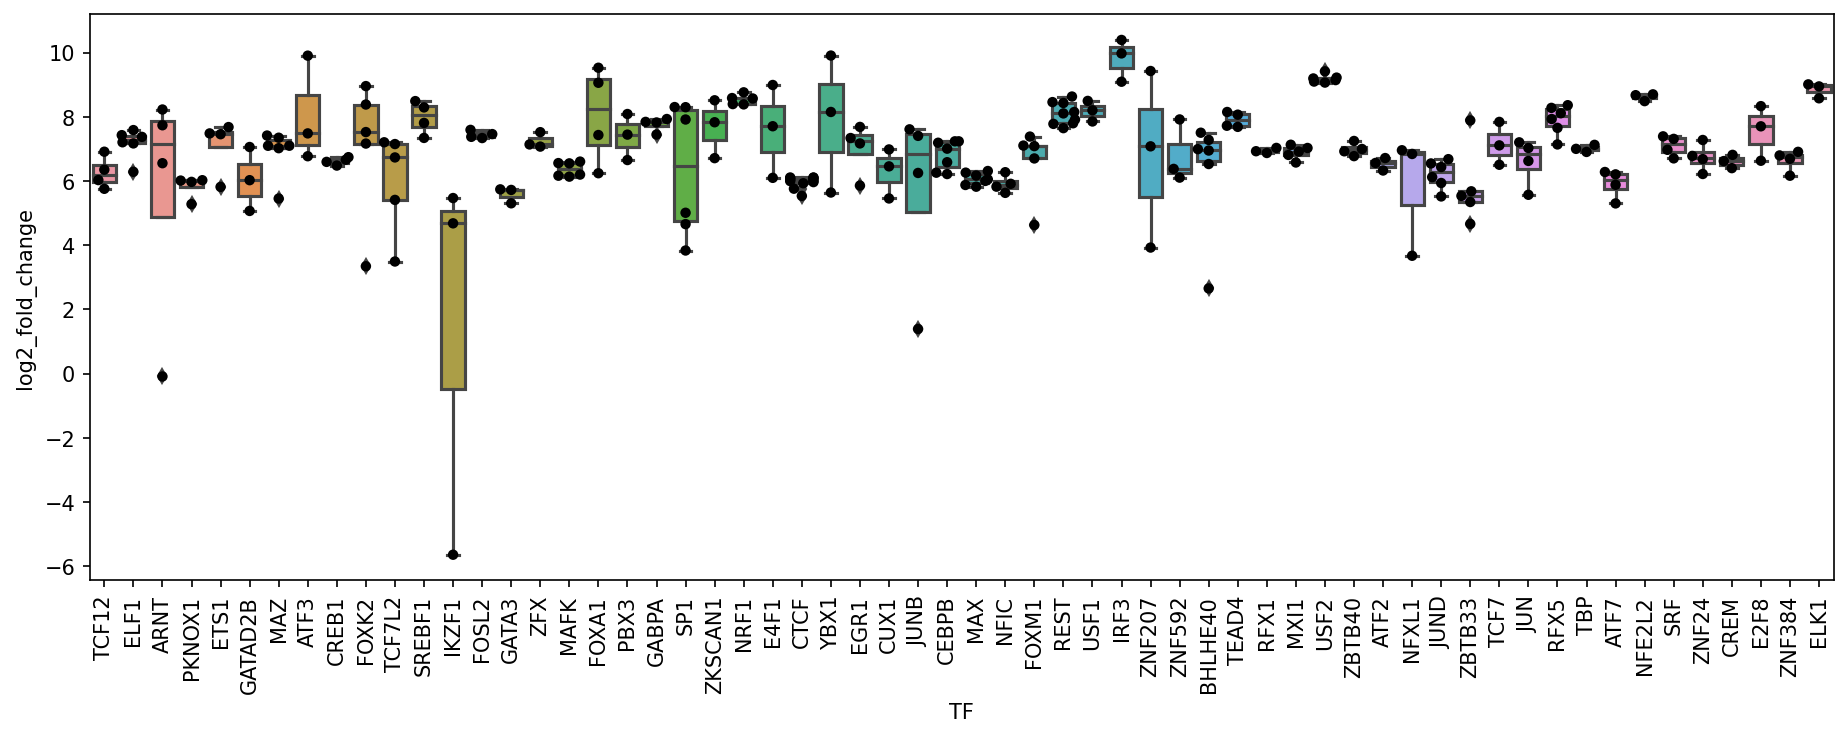

In [197]:
plt.figure(figsize=(15,5), dpi=150)

sns.boxplot(data=df_maxatac, x="TF", y="log2_fold_change")
sns.swarmplot(data=df_maxatac, x="TF", y="log2_fold_change", color="k")

plt.xticks(rotation=90)

In [198]:
df_maxatac["AUPR"].median()

0.42237309244365673

In [ ]:
  # "blue"   = "#00798c",
  # "red"    = "#d1495b",
  # "yellow" = "#edae49",
  # "green"  = "#66a182",
  # "navy"   = "#2e4057", 
  # "grey"   = "#8d96a3"

(0.0, 1.0)

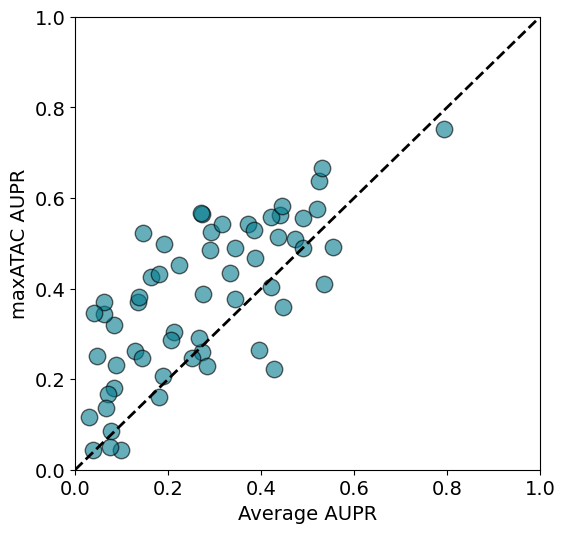

In [168]:
plt.figure(figsize=(6,6), dpi=100)
plt.scatter(y=df_maxatac_gb_stats["AUPR"], x=df_maxatac_gb_stats["average_aupr"], s=140, edgecolors="black", facecolors="#00798c", alpha=.6)
plt.plot([0,1], [0,1], color="k", ls="--", lw=2)
plt.xticks(size=14)
plt.yticks(size=14)
plt.ylabel("maxATAC AUPR", size=14)
plt.xlabel("Average AUPR", size=14)

plt.ylim(0,1)
plt.xlim(0,1)


In [132]:
len(df_maxatac["TF"].unique())

60

In [147]:
max_df = pd.DataFrame(df_maxatac["AUPR"])
max_df["method"] = "maxATAC"
max_df.columns = ["AUPR", "method"]

average_df = pd.DataFrame(df_maxatac["average_aupr"])
average_df["method"] = "Average"
average_df.columns = ["AUPR", "method"]



In [148]:
boxplot_df = pd.concat([max_df, average_df])

In [149]:
boxplot_df

,AUPR,method
0,0.568490,maxATAC
1,0.594381,maxATAC
2,0.110700,maxATAC
3,0.330661,maxATAC
4,0.436344,maxATAC
...,...,...
253,0.220928,Average
254,0.421257,Average
255,0.285323,Average
256,0.363285,Average


<AxesSubplot:xlabel='method', ylabel='AUPR'>

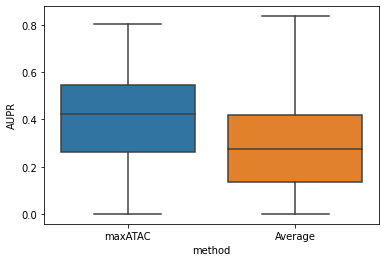

In [150]:
sns.boxplot(data=boxplot_df, x='method', y="AUPR")

## MOODS

In [83]:
def import_aupr_moods(file_path):
    tf = os.path.basename(file_path).split("_")[0]
    
    cell = os.path.basename(file_path).split("_")[1]
    
    ext_size = os.path.basename(file_path).split("_")[2]

    df = pd.read_csv(file_path, sep="\t", header=0)
    
    df.drop(df.tail(1).index,inplace=True) # drop last n rows

    df = df[["Precision", "Recall", "Total_GoldStandard_Bins"]]
    
    precision_list = df["Precision"].tolist()
    
    #print(precision_list[-1])
    
    #df = df[df["Recall"] != 1]
    df = pd.concat([df, 
                    pd.DataFrame({"Precision": [precision_list[-1]], 
                                  "Recall": [0]
                    })])
    
    AUPRC = metrics.auc(y=df["Precision"], x=df["Recall"])
    
    return [tf, cell, AUPRC, df["Total_GoldStandard_Bins"].unique()[0], ext_size]

In [84]:
results_list = []

for file in glob.glob("/Users/caz3so/scratch/20210818_maxATAC_MOOD_ENCODE_publication/benchmark/*.tsv"):
    tmp_df = import_aupr_moods(file)
    results_list.append(tmp_df)

In [85]:
df_moods = pd.DataFrame(results_list, columns=["TF", "Cell", "AUPRC", "GS_bins", "ext_size"])

In [86]:
df_moods = df_moods.sort_values(by=["TF", "Cell"])

In [87]:
df_moods["TF_CT"] = df_moods["TF"] + "_" + df_moods["Cell"]

Text(0.5, 0, 'Window Size')

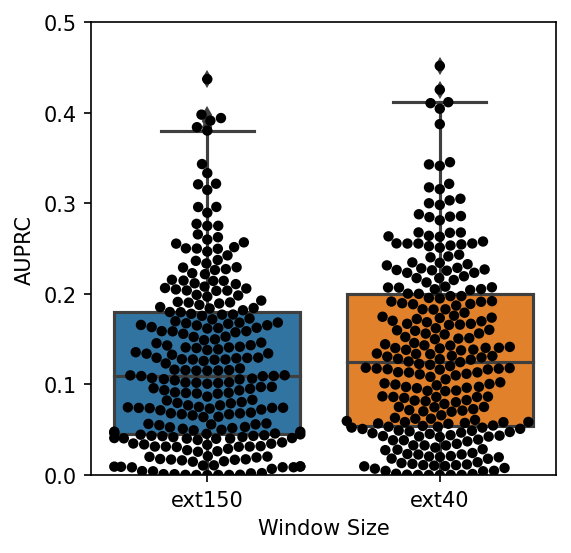

In [153]:


plt.figure(figsize=(4,4), dpi=150)
sns.boxplot(data=df_moods, x="ext_size", y="AUPRC")
sns.swarmplot(data=df_moods, x="ext_size", y="AUPRC", color="k")
plt.ylim(0,.5)
plt.xlabel("Window Size")


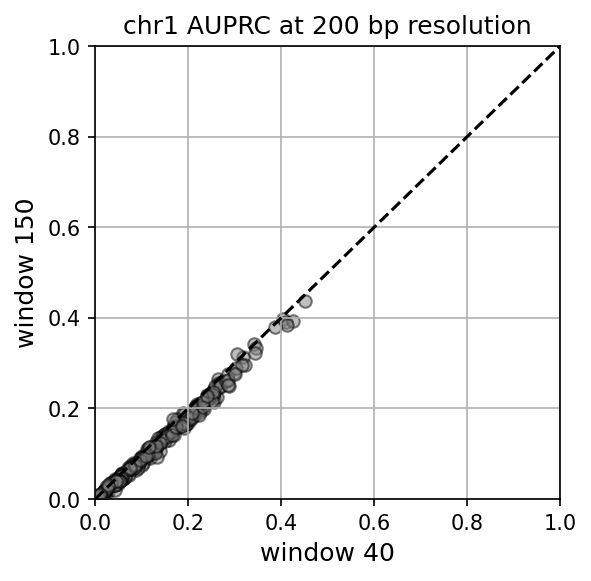

In [146]:
plt.figure(figsize=(4,4), dpi=150)

plt.scatter(x=df_moods[df_moods["ext_size"] == "ext40"]["AUPRC"], y=df_moods[df_moods["ext_size"] == "ext150"]["AUPRC"], facecolors="grey", edgecolors="k", alpha=.5)

plt.ylim(0,1)
plt.xlim(0,1)
plt.title("chr1 AUPRC at 200 bp resolution", size=12)
plt.ylabel("window 150", size=12)
plt.xlabel("window 40", size=12)
plt.grid()

plt.plot([0,1], [0,1], color="k", ls="--")

In [166]:
df_moods

,TF,Cell,AUPRC,GS_bins,ext_size,TF_CT
82,ARID3A,GM12878,0.074350,4012.0,ext150,ARID3A_GM12878
306,ARID3A,GM12878,0.092952,4012.0,ext40,ARID3A_GM12878
213,ARID3A,HepG2,0.105643,4301.0,ext150,ARID3A_HepG2
238,ARID3A,HepG2,0.138495,4301.0,ext40,ARID3A_HepG2
226,ARID3A,K562,0.064427,3798.0,ext150,ARID3A_K562
...,...,...,...,...,...,...
371,ZNF384,HEK293T,0.116654,6702.0,ext40,ZNF384_HEK293T
39,ZNF384,HepG2,0.166983,3276.0,ext40,ZNF384_HepG2
224,ZNF384,HepG2,0.175755,3276.0,ext150,ZNF384_HepG2
51,ZNF384,K562,0.161769,6270.0,ext150,ZNF384_K562


In [90]:
moods_dict = pd.Series(df_moods["AUPRC"].values, index=df_moods["TF_CT"]).to_dict()


In [180]:
df_maxatac["MOODS_AUPR"] = df_maxatac["pairs"].map(moods_dict)

In [181]:
df_maxatac[df_maxatac["MOODS_AUPR"] > 0]

,CT,TF,RandomRatio,Training,AUPR,BP_Resolution,Total_GoldStandard_Bins,pairs,MOODS_AUPR
11,A549,CEBPB,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.419184,200,2560,CEBPB_A549,0.168714
14,K562,BHLHE40,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.533620,200,7827,BHLHE40_K562,0.182719
18,A549,GATA3,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.382462,200,3347,GATA3_A549,0.100811
20,A549,SREBF1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.283293,200,270,SREBF1_A549,0.093494
24,MCF-7,CUX1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.231153,200,2539,CUX1_MCF-7,0.075230
...,...,...,...,...,...,...,...,...,...
1301,MCF-7,FOXM1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.236510,200,1362,FOXM1_MCF-7,0.031416
1305,K562,MXI1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.367088,200,2709,MXI1_K562,0.072318
1307,WA09,CTCF,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.728519,200,19584,CTCF_WA09,0.320908
1311,MCF-7,MAX,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.514772,200,6215,MAX_MCF-7,0.183933


In [182]:
df_maxatac[df_maxatac["MOODS_AUPR"] > 0]["CT"].unique()

array(['A549', 'K562', 'MCF-7', 'HepG2', 'GM12878', 'SK-N-SH', 'HCT116',
       'HEK293T', 'HEK293', 'GM23338', 'IMR-90', 'Panc1', 'PC-3', 'WA09'],
      dtype=object)

In [183]:
len(df_maxatac[df_maxatac["MOODS_AUPR"] > 0]["TF"].unique())

58

In [196]:
df_maxatac[df_maxatac["MOODS_AUPR"] > 0]["TF"].unique()

array(['CEBPB', 'BHLHE40', 'GATA3', 'SREBF1', 'CUX1', 'RFX1', 'USF2',
       'RFX5', 'E4F1', 'ELF1', 'USF1', 'FOXK2', 'ARID3A', 'TEAD4',
       'ZBTB33', 'TCF7L2', 'TBP', 'CREM', 'TCF7', 'ARNT', 'ETS1',
       'ZKSCAN1', 'ELK1', 'REST', 'ZFX', 'MAX', 'GABPA', 'MAFK', 'ZNF384',
       'FOXA1', 'ATF2', 'JUND', 'NRF1', 'TCF12', 'FOSL2', 'ZNF24',
       'CREB1', 'MXI1', 'EGR1', 'ESRRA', 'SP1', 'ATF3', 'JUN', 'ATF7',
       'CTCF', 'JUNB', 'FOXM1', 'NFE2L2', 'PKNOX1', 'IRF3', 'MAZ', 'NFIC',
       'MNT', 'SRF', 'PBX3', 'IKZF1', 'YBX1', 'E2F8'], dtype=object)

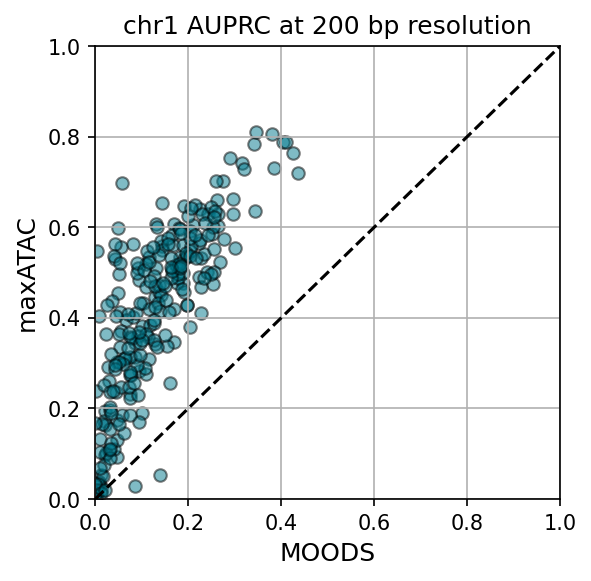

In [185]:
plt.figure(figsize=(4,4), dpi=150)

plt.scatter(y=df_maxatac["AUPR"], x=df_maxatac["MOODS_AUPR"], facecolors="#00798c", edgecolors="k", alpha=.5)

plt.ylim(0,1)
plt.xlim(0,1)
plt.title("chr1 AUPRC at 200 bp resolution", size=12)
plt.ylabel("maxATAC", size=12)
plt.xlabel("MOODS", size=12)
plt.grid()

plt.plot([0,1], [0,1], color="k", ls="--")

In [187]:
df_maxatac["diff"] = df_maxatac["AUPR"] - df_maxatac["MOODS_AUPR"]

In [188]:
df_maxatac[df_maxatac["diff"] < 0]

,CT,TF,RandomRatio,Training,AUPR,BP_Resolution,Total_GoldStandard_Bins,pairs,MOODS_AUPR,diff
486,HepG2,ZBTB33,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.053852,200,342,ZBTB33_HepG2,0.140224,-0.086372
715,SK-N-SH,ZBTB33,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.029522,200,2512,ZBTB33_SK-N-SH,0.085171,-0.055650


In [165]:
len(df_maxatac["TF"].unique())

60

In [95]:
def import_aupr_scATAC(file_path):
    tf = os.path.basename(file_path).split("_")[0]
    
    cell = os.path.basename(file_path).split("_")[1]
    
    df = pd.read_csv(file_path, sep="\t", header=0, nrows=1)
    
    df = df[["Precision", "Recall", "AUPRC", "Total_GoldStandard_Bins"]]
        
    return [tf, cell, df["AUPRC"].unique()[0], df["Total_GoldStandard_Bins"].unique()[0], "scATAC"]

In [210]:
results_list = []

for file in glob.glob("/Users/caz3so/scratch/20210831_maxATAC_ENCODE_v1_scATAC/collected_results/*.tsv.gz"):
    tmp_df = import_aupr_moods(file)
    results_list.append(tmp_df)

In [211]:
results_list

[['SREBF1', 'K562', 0.1255739833661549, 883.0, 'scATAC'],
 ['FOXK2', 'GM12878', 0.10784636535990055, 989.0, 'scATAC'],
 ['MNT', 'K562', 0.3832406052774069, 9328.0, 'scATAC'],
 ['E4F1', 'K562', 0.28737286030935005, 12034.0, 'scATAC'],
 ['ZBTB33', 'MCF-7', 0.014476113776964061, 1063.0, 'scATAC'],
 ['MXI1', 'K562', 0.4040000397410603, 2709.0, 'scATAC'],
 ['ATF7', 'K562', 0.185674082734139, 14201.0, 'scATAC'],
 ['FOXM1', 'GM12878', 0.31972233204165956, 4364.0, 'scATAC'],
 ['SP1', 'GM12878', 0.4029639985032682, 3463.0, 'scATAC'],
 ['RFX1', 'MCF-7', 0.49205289851109413, 6479.0, 'scATAC'],
 ['FOXM1', 'HEK293T', 0.07490019723254883, 937.0, 'scATAC'],
 ['ZNF24', 'K562', 0.22640677852666635, 10542.0, 'scATAC'],
 ['RFX5', 'MCF-7', 0.19790160030539802, 2132.0, 'scATAC'],
 ['SP1', 'HEK293T', 0.02305490794107002, 187.0, 'scATAC'],
 ['CTCF', 'MCF-7', 0.6764734468632339, 11696.0, 'scATAC'],
 ['JUND', 'MCF-7', 0.272672763561792, 2371.0, 'scATAC'],
 ['IKZF1', 'GM12878', 0.6114983177897176, 19955.0, 'scA

In [212]:
df_scATAC = pd.DataFrame(results_list, columns=["TF", "Cell", "AUPRC", "GS_bins", "EXP_type"])

In [213]:
df_scATAC["TF_CT"] = df_scATAC["TF"] + "_" + df_scATAC["Cell"]

In [214]:
df_scATAC

,TF,Cell,AUPRC,GS_bins,EXP_type,TF_CT
0,SREBF1,K562,0.125574,883.0,scATAC,SREBF1_K562
1,FOXK2,GM12878,0.107846,989.0,scATAC,FOXK2_GM12878
2,MNT,K562,0.383241,9328.0,scATAC,MNT_K562
3,E4F1,K562,0.287373,12034.0,scATAC,E4F1_K562
4,ZBTB33,MCF-7,0.014476,1063.0,scATAC,ZBTB33_MCF-7
...,...,...,...,...,...,...
151,JUN,K562,0.318981,5829.0,scATAC,JUN_K562
152,IKZF1,K562,0.342440,16383.0,scATAC,IKZF1_K562
153,FOXA1,K562,0.098235,318.0,scATAC,FOXA1_K562
154,PBX3,GM12878,0.072269,581.0,scATAC,PBX3_GM12878


In [215]:
scATAC_dict = pd.Series(df_scATAC["AUPRC"].values, index=df_scATAC["TF_CT"]).to_dict()


In [216]:
scATAC_dict

{'SREBF1_K562': 0.1255739833661549,
 'FOXK2_GM12878': 0.10784636535990055,
 'MNT_K562': 0.3832406052774069,
 'E4F1_K562': 0.28737286030935005,
 'ZBTB33_MCF-7': 0.014476113776964061,
 'MXI1_K562': 0.4040000397410603,
 'ATF7_K562': 0.185674082734139,
 'FOXM1_GM12878': 0.31972233204165956,
 'SP1_GM12878': 0.4029639985032682,
 'RFX1_MCF-7': 0.49205289851109413,
 'FOXM1_HEK293T': 0.07490019723254883,
 'ZNF24_K562': 0.22640677852666635,
 'RFX5_MCF-7': 0.19790160030539802,
 'SP1_HEK293T': 0.02305490794107002,
 'CTCF_MCF-7': 0.6764734468632339,
 'JUND_MCF-7': 0.272672763561792,
 'IKZF1_GM12878': 0.6114983177897176,
 'ZBTB40_GM12878': 0.3405930907813105,
 'GATAD2B_K562': 0.19233281546766293,
 'CTCF_GM12878': 0.5777854832778057,
 'ARID3A_K562': 0.23617150416609622,
 'EGR1_K562': 0.3858352655871874,
 'TCF7_GM12878': 0.25813416615175466,
 'NFIC_K562': 0.44685889937827383,
 'MXI1_GM12878': 0.5130757925436412,
 'NRF1_GM12878': 0.7050169958938102,
 'FOXK2_HEK293T': 0.08480618478885286,
 'ZNF384_HEK29

In [217]:
df_maxatac["scATAC_AUPR"] = df_maxatac["pairs"].map(scATAC_dict)

In [218]:
df_maxatac

,CT,TF,RandomRatio,Training,AUPR,BP_Resolution,Total_GoldStandard_Bins,pairs,MOODS_AUPR,diff,scATAC_AUPR
11,A549,CEBPB,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.419184,200,2560,CEBPB_A549,0.168714,0.250470,NaN
14,K562,BHLHE40,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.533620,200,7827,BHLHE40_K562,0.182719,0.350901,0.400253
18,A549,GATA3,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.382462,200,3347,GATA3_A549,0.100811,0.281651,NaN
20,A549,SREBF1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.283293,200,270,SREBF1_A549,0.093494,0.189799,NaN
24,MCF-7,CUX1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.231153,200,2539,CUX1_MCF-7,0.075230,0.155923,0.090259
...,...,...,...,...,...,...,...,...,...,...,...
1301,MCF-7,FOXM1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.236510,200,1362,FOXM1_MCF-7,0.031416,0.205095,0.097656
1305,K562,MXI1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.367088,200,2709,MXI1_K562,0.072318,0.294770,0.404000
1307,WA09,CTCF,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.728519,200,19584,CTCF_WA09,0.320908,0.407611,NaN
1311,MCF-7,MAX,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.514772,200,6215,MAX_MCF-7,0.183933,0.330839,0.423466


In [219]:
df_maxatac[df_maxatac["scATAC_AUPR"] > 0]["CT"].unique()

array(['K562', 'MCF-7', 'GM12878', 'HEK293T'], dtype=object)

In [220]:
len(df_maxatac[df_maxatac["scATAC_AUPR"] > 0]["TF"].unique())

61

In [222]:
df_maxatac[df_maxatac["scATAC_AUPR"] > 0]["TF"].unique()

array(['BHLHE40', 'CUX1', 'GATA3', 'USF2', 'E4F1', 'SREBF1', 'FOXK2',
       'ZBTB40', 'ARID3A', 'TEAD4', 'ZBTB33', 'TBP', 'ZNF207', 'TCF7',
       'ARNT', 'ZKSCAN1', 'ELK1', 'REST', 'ELF1', 'ZNF592', 'ZNF384',
       'MAX', 'FOXA1', 'ATF2', 'JUND', 'NFXL1', 'NRF1', 'ZNF24', 'CREB1',
       'EGR1', 'ESRRA', 'SP1', 'ATF3', 'MAFK', 'ATF7', 'GATAD2B', 'JUNB',
       'FOXM1', 'RFX1', 'CEBPB', 'PKNOX1', 'TCF12', 'ZFX', 'IRF3', 'CTCF',
       'RFX5', 'GABPA', 'FOSL2', 'NFIC', 'JUN', 'ETS1', 'CREM', 'IKZF1',
       'SRF', 'YBX1', 'MAZ', 'TCF7L2', 'MXI1', 'MNT', 'E2F8', 'PBX3'],
      dtype=object)

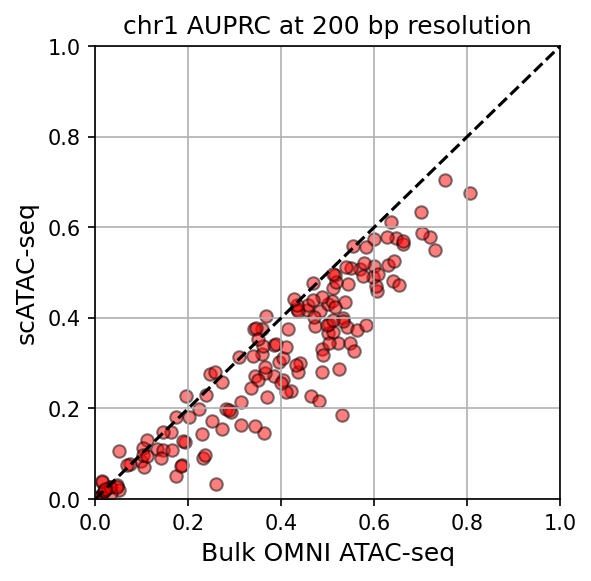

In [223]:

plt.figure(figsize=(4,4), dpi=150)

plt.scatter(y=df_maxatac["scATAC_AUPR"], x=df_maxatac["AUPR"], facecolors="red", edgecolors="k", alpha=.5)

plt.ylim(0,1)
plt.xlim(0,1)
plt.title("chr1 AUPRC at 200 bp resolution", size=12)
plt.ylabel("scATAC-seq", size=12)
plt.xlabel("Bulk OMNI ATAC-seq", size=12)
plt.grid()

plt.plot([0,1], [0,1], color="k", ls="--")

In [106]:
plt.figure(figsize=(4,4), dpi=150)
sns.boxplot(x=['bulk', 'scATAC'], y = [df_maxatac['scATAC_AUPR'], df_maxatac['AUPR']])
sns.swarmplot(data=df_maxatac, x="ext_size", y="AUPRC", color="k")

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 600x600 with 0 Axes>

In [199]:
df_maxatac

,CT,TF,RandomRatio,Training,AUPR,BP_Resolution,Total_GoldStandard_Bins,pairs,MOODS_AUPR,diff,scATAC_AUPR
11,A549,CEBPB,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.419184,200,2560,CEBPB_A549,0.168714,0.250470,NaN
14,K562,BHLHE40,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.533620,200,7827,BHLHE40_K562,0.182719,0.350901,0.400253
18,A549,GATA3,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.382462,200,3347,GATA3_A549,0.100811,0.281651,NaN
20,A549,SREBF1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.283293,200,270,SREBF1_A549,0.093494,0.189799,NaN
24,MCF-7,CUX1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.231153,200,2539,CUX1_MCF-7,0.075230,0.155923,0.090259
...,...,...,...,...,...,...,...,...,...,...,...
1301,MCF-7,FOXM1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.236510,200,1362,FOXM1_MCF-7,0.031416,0.205095,0.097656
1305,K562,MXI1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.367088,200,2709,MXI1_K562,0.072318,0.294770,NaN
1307,WA09,CTCF,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.728519,200,19584,CTCF_WA09,0.320908,0.407611,NaN
1311,MCF-7,MAX,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.514772,200,6215,MAX_MCF-7,0.183933,0.330839,0.423466


In [202]:
no_moods_list = df_maxatac[df_maxatac["MOODS_AUPR"].isnull()]["TF"].unique().tolist()

In [203]:
df_maxatac_noMoods = df_maxatac[df_maxatac["TF"].isin(no_moods_list)]

In [165]:
len(df_maxatac["TF"].unique())

60

/Users/caz3so/anaconda3/envs/maxatac/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AUPR'>

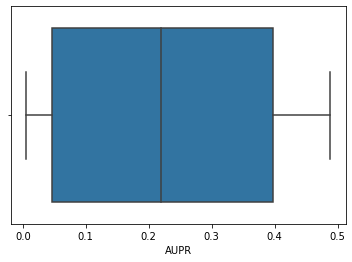

In [205]:
sns.boxplot(df_maxatac_noMoods["AUPR"])

In [206]:
df_maxatac_noMoods

,CT,TF,RandomRatio,Training,AUPR,BP_Resolution,Total_GoldStandard_Bins,pairs,MOODS_AUPR,diff,scATAC_AUPR
104,K562,ZBTB40,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.435401,200,10754,ZBTB40_K562,NaN,NaN,0.279807
128,GM12878,ZNF207,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.363067,200,2719,ZNF207_GM12878,NaN,NaN,0.146535
193,GM12878,ZNF592,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.101985,200,1862,ZNF592_GM12878,NaN,NaN,0.113135
208,MCF-7,ZNF207,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.046455,200,430,ZNF207_MCF-7,NaN,NaN,NaN
222,MCF-7,NFXL1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.010896,200,260,NFXL1_MCF-7,NaN,NaN,0.003306
320,HepG2,ZBTB40,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.397751,200,917,ZBTB40_HepG2,NaN,NaN,NaN
333,GM12878,GATAD2B,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.488407,200,8694,GATAD2B_GM12878,NaN,NaN,0.330463
540,GM12878,NFXL1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.009450,200,421,NFXL1_GM12878,NaN,NaN,0.004440
742,GM12878,ZBTB40,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.383902,200,3046,ZBTB40_GM12878,NaN,NaN,0.340593
855,MCF-7,ZNF592,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.146809,200,1210,ZNF592_MCF-7,NaN,NaN,0.107814


In [207]:
sns.boxplot(data=df_maxatac, x="CT", y=df_maxatac[df_maxatac["TF"]])

,CT,TF,RandomRatio,Training,AUPR,BP_Resolution,Total_GoldStandard_Bins,pairs,MOODS_AUPR,diff,scATAC_AUPR
11,A549,CEBPB,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.419184,200,2560,CEBPB_A549,0.168714,0.250470,NaN
14,K562,BHLHE40,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.533620,200,7827,BHLHE40_K562,0.182719,0.350901,0.400253
18,A549,GATA3,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.382462,200,3347,GATA3_A549,0.100811,0.281651,NaN
20,A549,SREBF1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.283293,200,270,SREBF1_A549,0.093494,0.189799,NaN
24,MCF-7,CUX1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.231153,200,2539,CUX1_MCF-7,0.075230,0.155923,0.090259
...,...,...,...,...,...,...,...,...,...,...,...
1301,MCF-7,FOXM1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.236510,200,1362,FOXM1_MCF-7,0.031416,0.205095,0.097656
1305,K562,MXI1,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.367088,200,2709,MXI1_K562,0.072318,0.294770,NaN
1307,WA09,CTCF,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.728519,200,19584,CTCF_WA09,0.320908,0.407611,NaN
1311,MCF-7,MAX,0.0,20210817_ENCODE_v1_roundRobin_allRandomRatios_...,0.514772,200,6215,MAX_MCF-7,0.183933,0.330839,0.423466
